# Linear Regression:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline

## Ferret Performance Data

In [9]:
data = pd.read_csv('ferret_perf.csv')
data.info()

data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 33 columns):
Configuration           599 non-null object
ACYC                    5520 non-null float64
AFREQ                   5520 non-null float64
C0res%                  5520 non-null float64
C10res%                 5520 non-null int64
C1res%                  5520 non-null float64
C2res%                  5520 non-null int64
C3res%                  5520 non-null int64
C4res%                  5520 non-null int64
C5res%                  5520 non-null int64
C6res%                  5520 non-null int64
C7res%                  5520 non-null int64
C8res%                  5520 non-null int64
C9res%                  5520 non-null int64
EXEC                    5520 non-null float64
FREQ                    5520 non-null float64
INST                    5520 non-null float64
INSTnom                 5520 non-null float64
INSTnom%                5520 non-null float64
IPC                     5520 non-null f

Configuration      ACYC  AFREQ  C0res%  C10res%   C1res%  \
0    hash-8-iteration-7-probe-4  111000.0  0.974    91.8        0   8.2200   
1    hash-8-iteration-7-probe-5   53400.0  1.050    51.6        0  41.0000   
2    hash-8-iteration-7-probe-6  164000.0  1.030    95.2        0   4.7700   
3    hash-8-iteration-7-probe-7   35700.0  0.988    36.1        0  38.0000   
4    hash-8-iteration-7-probe-8  274000.0  1.010    93.5        0   6.4900   
5    hash-8-iteration-7-probe-9   72100.0  1.010    72.2        0  26.3000   
6   hash-8-iteration-7-probe-10   67500.0  0.974    61.7        0  36.3000   
7   hash-8-iteration-7-probe-11  231000.0  1.040    99.9        0   0.0901   
8   hash-8-iteration-7-probe-12  392000.0  1.000    97.3        0   2.7100   
9   hash-8-iteration-7-probe-13  417000.0  1.010    82.9        0  17.1000   
10  hash-8-iteration-7-probe-14   66100.0  1.040    61.9        0  35.4000   
11  hash-8-iteration-7-probe-15  129000.0  0.980    97.2        0   2.2100   
12  hash-8-iteration-7-probe-16  128000.0  1.030    94.5        0   5.5100   
13  hash-8-iteration-7-probe-17   36400.0  1.040    36.2        0  40.7000   
14  hash-8-iteration-7-probe-18   49000.0  1.050    47.6        0  44.2000   

    C2res%  C3res%  C4res%  C5res%    ...     L3HIT  L3MISS     L3MPI  \
0        0       0       0       0    ...     0.248    32.8  0.000247   
1        0       0       0       0    ...     0.210    26.5  0.000421   
2        0       0       0       0    ...     0.298    17.2  0.000077   
3        0       0       0       0    ...     0.268    13.5  0.000238   
4        0       0       0       0    ...     0.266    52.2  0.000159   
5        0       0       0       0    ...     0.340    19.9  0.000191   
6        0       0       0       0    ...     0.259    27.8  0.000401   
7        0       0       0       0    ...     0.482    42.8  0.000158   
8        0       0       0       0    ...     0.364    80.9  0.000180   
9        0       0       0       0    ...     0.272    89.4  0.000161   
10       0       0       0       0    ...     0.263    23.8  0.000278   
11       0       0       0       0    ...     0.459    29.6  0.000201   
12       0       0       0       0    ...     0.354    51.2  0.000559   
13       0       0       0       0    ...     0.291    13.2  0.000229   
14       0       0       0       0    ...     0.274    15.5  0.000236   

    PhysIPC  PhysIPC%  Proc Energy (Joules)   READ  TIME(ticks)  WRITE  \
0      2.39      59.6                 207.0  16.30      15600.0   27.9   
1      2.36      59.0                 169.0  14.20      12400.0   27.3   
2      2.73      68.3                 355.0  12.30      20900.0   19.8   
3      3.17      79.2                 118.0   8.71      12500.0   13.9   
4      2.39      59.7                 550.0  30.50      36500.0   64.9   
5      2.90      72.5                 180.0  11.70      12400.0   16.5   
6      2.05      51.3                 158.0  16.60      14000.0   38.2   
7      2.34      58.6                 492.0  34.80      27800.0   43.1   
8      2.30      57.5                 768.0  58.50      50200.0   98.4   
9      2.66      66.5                 955.0  59.60      62100.0  115.0   
10     2.60      64.9                 191.0  12.60      12800.0   25.5   
11     2.28      57.1                 235.0  21.90      16900.0   27.5   
12     1.43      35.8                 247.0  36.00      16400.0   47.6   
13     3.16      79.0                 137.0   8.68      12000.0   14.1   
14     2.69      67.3                 166.0  11.40      12300.0   27.2   

    Slowdown  
0   1.355505  
1   1.094605  
2   1.807919  
3   1.134641  
4   3.127620  
5   1.090219  
6   1.274785  
7   2.370439  
8   4.273765  
9   5.261187  
10  1.169733  
11  1.480174  
12  1.463159  
13  1.106769  
14  1.088034  

[15 rows x 33 columns]

Here, Slowdown is considered as the dependent variable and the rest as independent variables. So the Slowdown needs to be predicted given the independent variables.

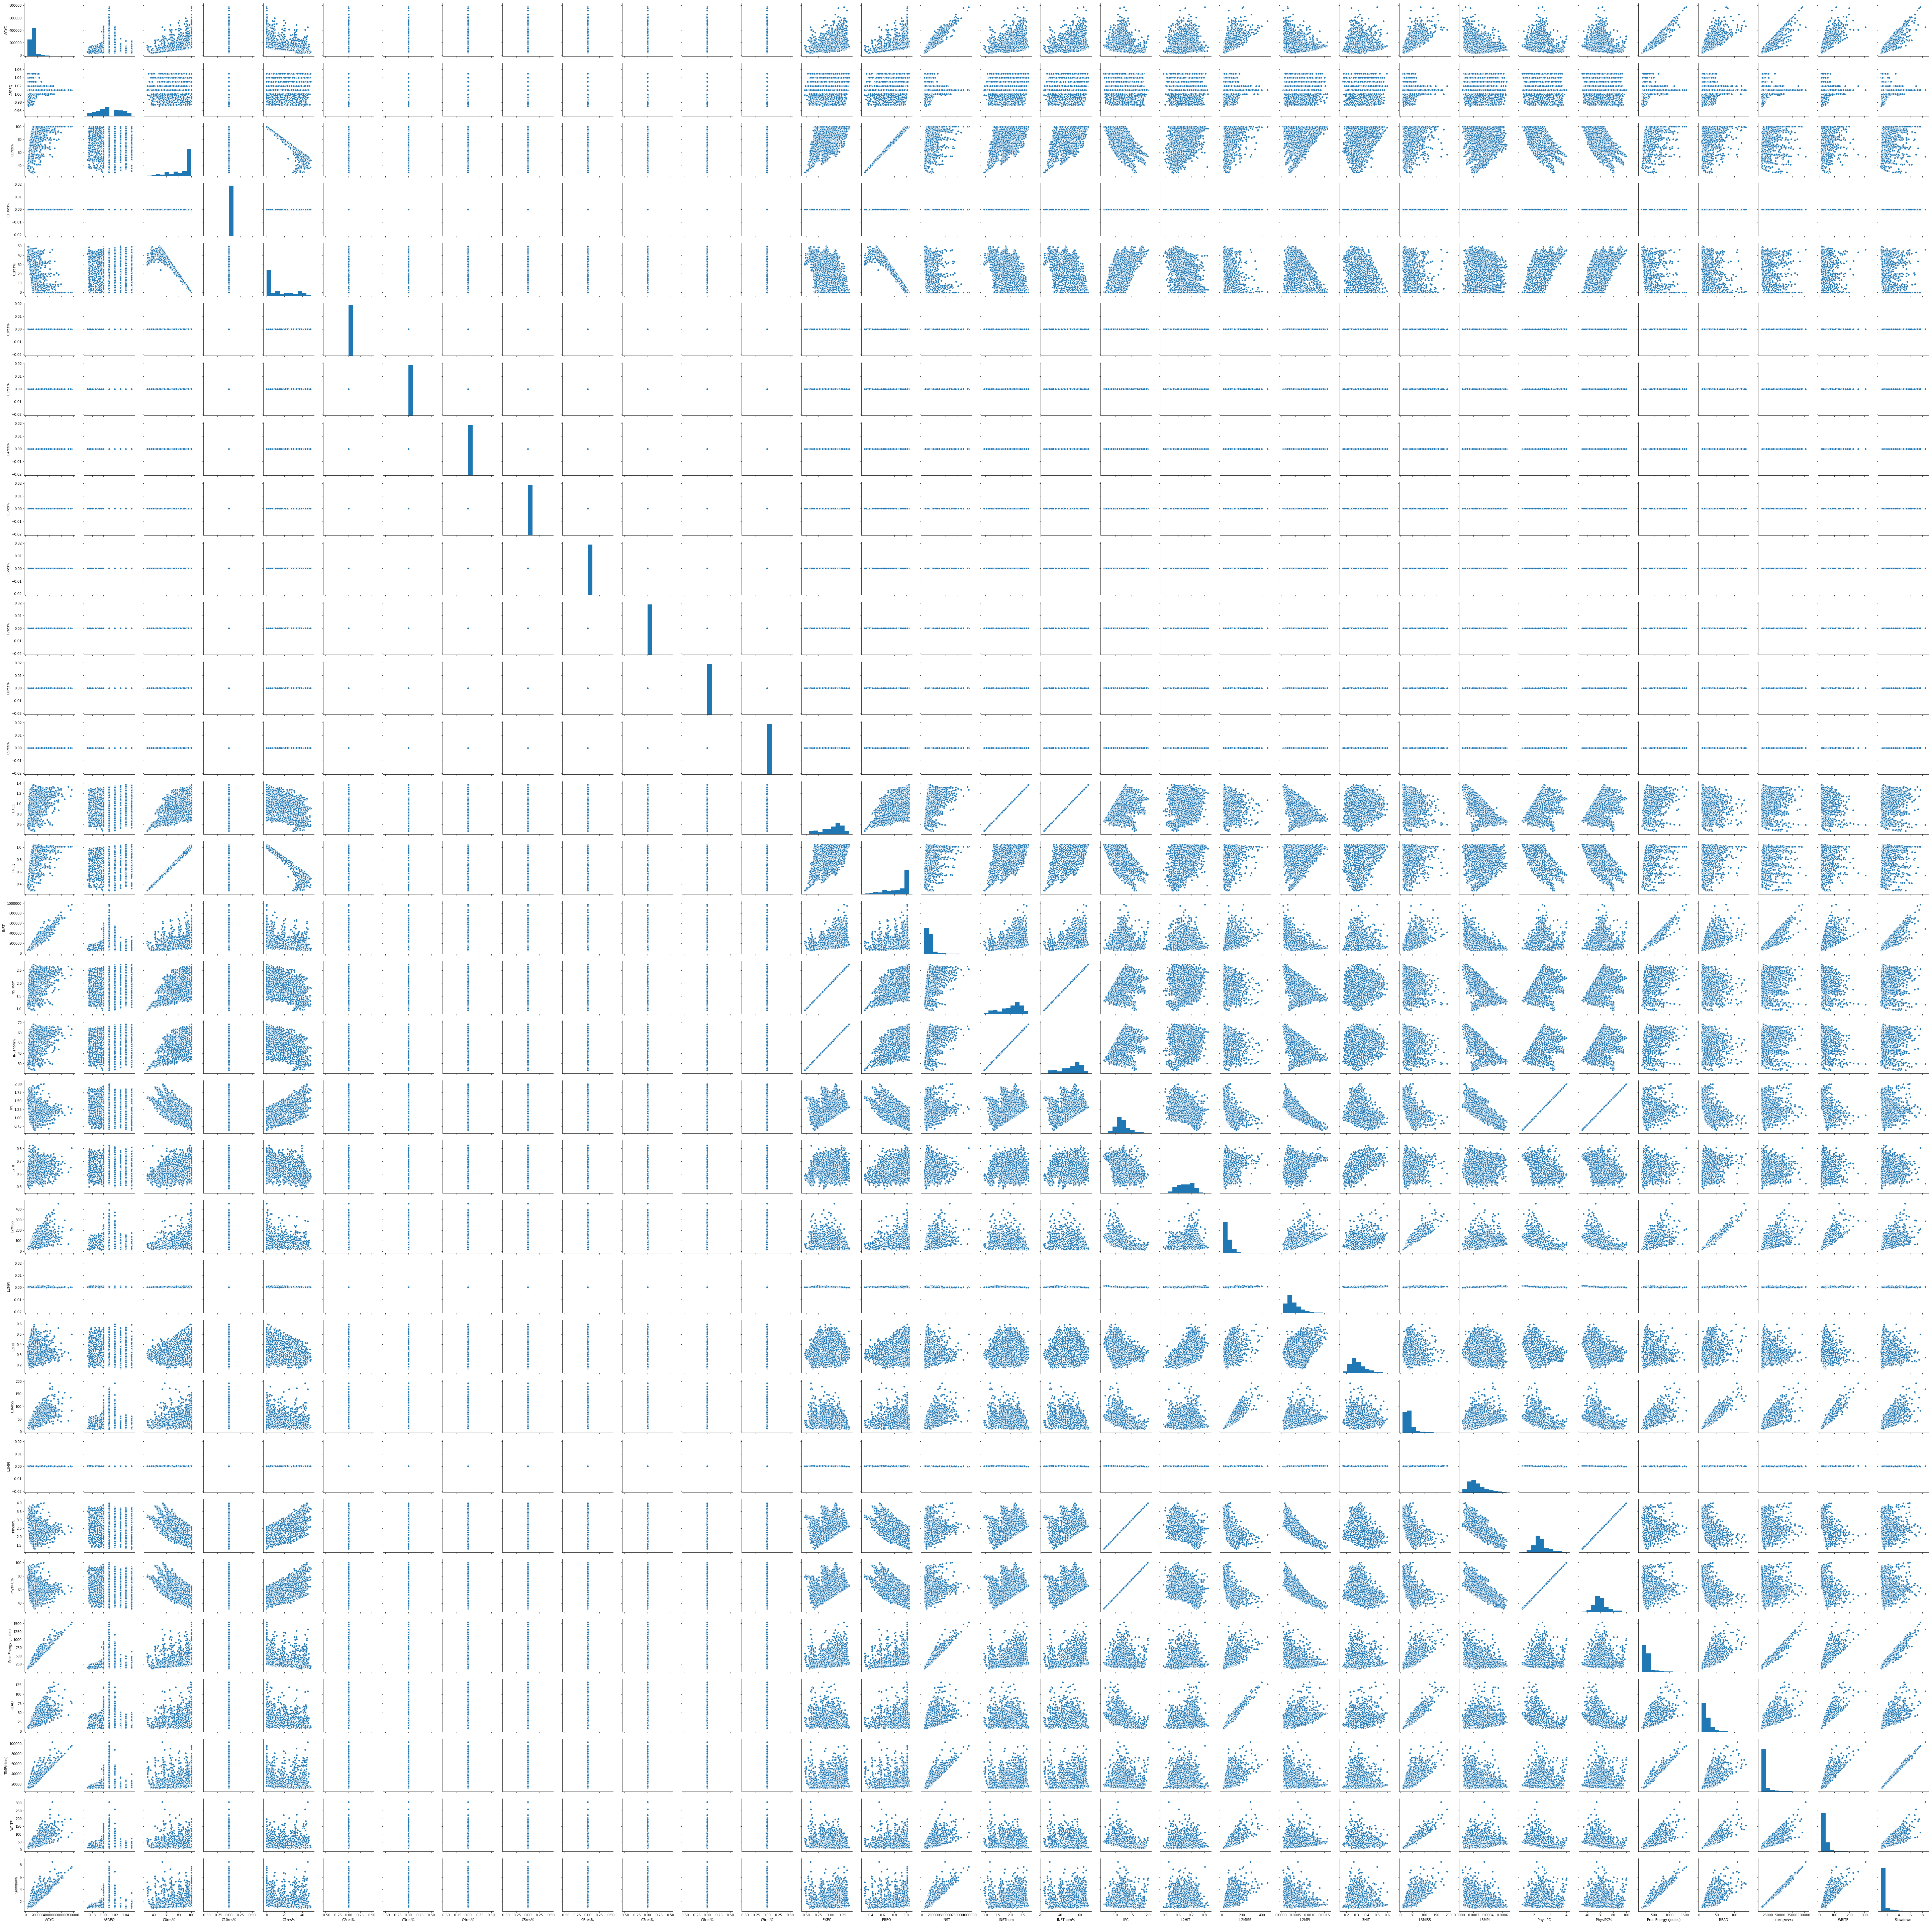

In [10]:
sns.pairplot(data)

/home/rajanya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


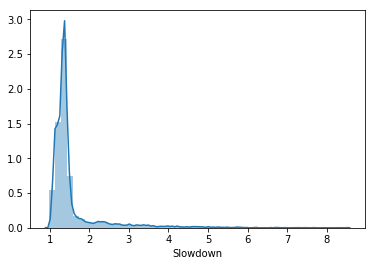

In [11]:
sns.distplot(data['Slowdown'])

In [12]:
data.corr()

ACYC     AFREQ    C0res%  C10res%    C1res%  C2res%  \
ACYC                  1.000000 -0.014791  0.453176      NaN -0.449074     NaN   
AFREQ                -0.014791  1.000000 -0.024509      NaN  0.021493     NaN   
C0res%                0.453176 -0.024509  1.000000      NaN -0.974407     NaN   
C10res%                    NaN       NaN       NaN      NaN       NaN     NaN   
C1res%               -0.449074  0.021493 -0.974407      NaN  1.000000     NaN   
C2res%                     NaN       NaN       NaN      NaN       NaN     NaN   
C3res%                     NaN       NaN       NaN      NaN       NaN     NaN   
C4res%                     NaN       NaN       NaN      NaN       NaN     NaN   
C5res%                     NaN       NaN       NaN      NaN       NaN     NaN   
C6res%                     NaN       NaN       NaN      NaN       NaN     NaN   
C7res%                     NaN       NaN       NaN      NaN       NaN     NaN   
C8res%                     NaN       NaN       NaN      NaN       NaN     NaN   
C9res%                     NaN       NaN       NaN      NaN       NaN     NaN   
EXEC                  0.330592  0.074412  0.725923      NaN -0.697735     NaN   
FREQ                  0.451203  0.071028  0.995112      NaN -0.969669     NaN   
INST                  0.953528 -0.015586  0.335840      NaN -0.331841     NaN   
INSTnom               0.330754  0.074375  0.725904      NaN -0.697725     NaN   
INSTnom%              0.330693  0.074518  0.725970      NaN -0.697806     NaN   
IPC                  -0.235561  0.002249 -0.536294      NaN  0.511369     NaN   
L2HIT                 0.175694 -0.007919  0.463278      NaN -0.460215     NaN   
L2MISS                0.644504 -0.019727  0.219772      NaN -0.210592     NaN   
L2MPI                -0.063687 -0.007722 -0.082693      NaN  0.096067     NaN   
L3HIT                 0.123539 -0.014818  0.191492      NaN -0.213345     NaN   
L3MISS                0.714783 -0.016864  0.183271      NaN -0.165290     NaN   
L3MPI                -0.159973 -0.002729 -0.233331      NaN  0.255081     NaN   
PhysIPC              -0.235863  0.002249 -0.536323      NaN  0.511435     NaN   
PhysIPC%             -0.235712  0.002318 -0.536227      NaN  0.511281     NaN   
Proc Energy (Joules)  0.957019  0.076397  0.232558      NaN -0.227547     NaN   
READ                  0.718305 -0.022900  0.211927      NaN -0.204871     NaN   
TIME(ticks)           0.899568 -0.042395  0.083011      NaN -0.092114     NaN   
WRITE                 0.761426 -0.014507  0.101350      NaN -0.082563     NaN   
Slowdown              0.891077 -0.040932  0.071508      NaN -0.080304     NaN   

                      C3res%  C4res%  C5res%  C6res%    ...        L3HIT  \
ACYC                     NaN     NaN     NaN     NaN    ...     0.123539   
AFREQ                    NaN     NaN     NaN     NaN    ...    -0.014818   
C0res%                   NaN     NaN     NaN     NaN    ...     0.191492   
C10res%                  NaN     NaN     NaN     NaN    ...          NaN   
C1res%                   NaN     NaN     NaN     NaN    ...    -0.213345   
C2res%                   NaN     NaN     NaN     NaN    ...          NaN   
C3res%                   NaN     NaN     NaN     NaN    ...          NaN   
C4res%                   NaN     NaN     NaN     NaN    ...          NaN   
C5res%                   NaN     NaN     NaN     NaN    ...          NaN   
C6res%                   NaN     NaN     NaN     NaN    ...          NaN   
C7res%                   NaN     NaN     NaN     NaN    ...          NaN   
C8res%                   NaN     NaN     NaN     NaN    ...          NaN   
C9res%                   NaN     NaN     NaN     NaN    ...          NaN   
EXEC                     NaN     NaN     NaN     NaN    ...     0.047205   
FREQ                     NaN     NaN     NaN     NaN    ...     0.189132   
INST                     NaN     NaN     NaN     NaN    ...     0.068260   
INSTnom                  NaN     NaN     NaN     NaN    ... 

## Training a Linear Regression Model

In [13]:
X = data[['ACYC','AFREQ','C0res%','C10res%','C1res%','C2res%','C3res%','C4res%','C5res%','C6res%','C7res%','C8res%',
            'C9res%','EXEC','FREQ','INST','INSTnom','INSTnom%','IPC','L2HIT','L2MISS','L2MPI','L3HIT','L3MISS','L3MPI',
            'PhysIPC','PhysIPC%','Proc Energy (Joules)','READ','TIME(ticks)','WRITE']]
y = data['Slowdown']

## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

### Simple linear regression:

is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable")
It takes the following form:
y=β0+β1x,

y  is the response,
x  is the feature,
β0  is the intercept,
β1  is the coefficient for x,

β0  and  β1  are called the model coefficients

In [15]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predictions from our Model

In [16]:
y_pred = lm.predict(X_test)

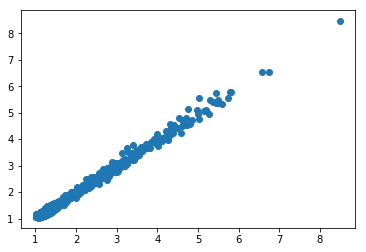

In [17]:
plt.scatter(y_test, y_pred)

In [18]:
from sklearn import metrics

# RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.06453313144498776

In [19]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred) 

0.9915685759533069

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)  

0.9915633456119798